<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [0]:
# https://github.com/numpy/numpy
import numpy as np

# https://github.com/pandas-dev/pandas
import pandas as pd

# https://github.com/pydata/pandas-datareader
import pandas_datareader as web

# https://github.com/matplotlib/matplotlib
import matplotlib.pyplot as plt

# https://github.com/mwaskom/seaborn 
import seaborn as sns
sns.set()

# https://github.com/jupyter-widgets/ipywidgets
import ipywidgets as widgets

# https://github.com/ranaroussi/yfinance
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d196f592ffa539ec835a8322a8d5773a02456d6d67b15ced3f73551c95bbff8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b4dq2g34/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


# 2. Obtendo e tratando os dados.

In [0]:
# Selecione o Ativo.
d = widgets.Dropdown(options=['^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'], value=None)
d

Dropdown(options=('^BVSP', 'ITUB3.SA', 'ITUB4.SA', 'ITSA3.SA', 'ITSA4.SA', 'VALE3.SA'), value=None)

In [0]:
# %d Defina a seleção.
d = d.value
d

'ITSA3.SA'

In [0]:
# %ativo Carregue o Ativo selecionado.
ativo = web.get_data_yahoo(n)


In [0]:
# Conheça os dados mais antigos para o Ativo.
ativo.head()

In [0]:
# Conheça os dados mais recentes para o Ativo.
ativo.tail()

In [0]:
# Desenhe um gráfico com médias móveis para as referencias de fechamento de todo o período do dado do Ativo.
ativo["Close"].plot(figsize=(22,8), label=n)
ativo["Close"].rolling(21).mean().plot(label="MM21")
ativo["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_ano Desenhe um gráfico com médias móveis para as referências de fechamento do período de um ano do Ativo.
ativo_ano = ativo[ativo.index.year == 2015]
ativo_ano["Close"].plot(figsize=(22,8), label=n)
ativo_ano["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_ano2 Desenhe um gráfico com médias móveis para as referências de um período entre anos do Ativo.
ativo_ano2 = ativo[(ativo.index.year >= 2015) & (ativo.index.year <= 2018)]
ativo_ano2["Close"].plot(figsize=(22,8), label=n)
ativo_ano2["Close"].rolling(21).mean().plot(label="MM21")
ativo_ano2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_dia Relacione os dados para um dia específico para 50(máximo) repetições do Ativo.
ativo_dia = ativo[ativo.index.day == 14]
ativo_dia.tail(50)

In [0]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_dia["Close"].plot(figsize=(22,8), label=n)
ativo_dia["Close"].rolling(21).mean().plot(label="MM21")
ativo_dia["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo_mes elacione os dados para um mês específico para 100(máximo) repetições do Ativo.
ativo_mes = ativo[ativo.index.month == 12]
ativo_mes.tail(100)

In [0]:
# Desenhe um gráfico com médias móveis para o relacionamento anterior.
ativo_mes["Close"].plot(figsize=(22,8), label=n)
ativo_mes["Close"].rolling(21).mean().plot(label="MM21")
ativo_mes["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %ativo2 Carregue o Ativo para um intervalo definido de data.
ativo2 = web.get_data_yahoo(n, start='2019-01-01', end='2020-01-01')
ativo2["Close"].plot(figsize=(22,8), label=n)
ativo2["Close"].rolling(21).mean().plot(label="MM21")
ativo2["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [0]:
# %portfolio Estabelecendo relações entre Ativos.
tickers = ["^BVSP", "USDBRL=X"]
portfolio = web.get_data_yahoo(tickers)["Close"]
portfolio

Symbols,^BVSP,USDBRL=X
Date,,
2015-05-10,NaN,2.9712
2015-05-11,57197.000000,3.0564
2015-05-12,56792.000000,3.0175
2015-05-13,56372.000000,3.0365
2015-05-14,56657.000000,2.9899
...,...,...
2020-05-04,78876.000000,5.5406
2020-05-05,79471.000000,5.5781
2020-05-06,79064.000000,5.7152


In [0]:
# Limpar a tabela dropando os dados faltantes.
portfolio = portfolio.dropna()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed8d3a588>,
      dtype=object)

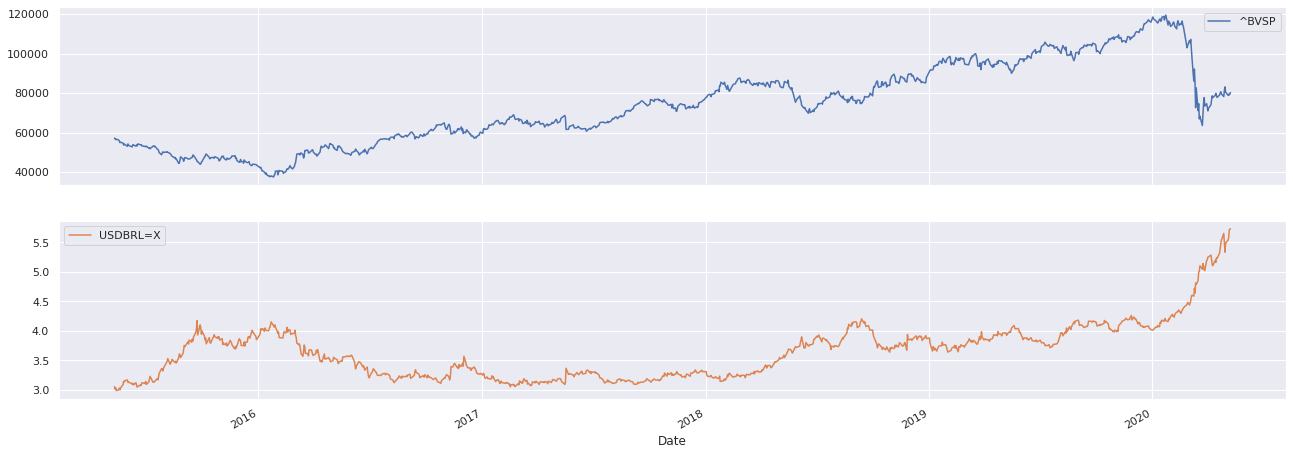

In [0]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [0]:
# Estabelecer uma correlação entre Ativos.
portfolio.corr()

Symbols,^BVSP,USDBRL=X
Symbols,,
^BVSP,1.000000,0.368628
USDBRL=X,0.368628,1.000000


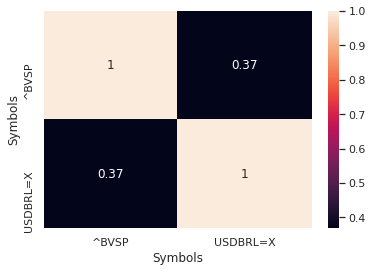

In [0]:
# Calcular a correlação entre os Ativo.
sns.heatmap(portfolio.corr(), annot=True)

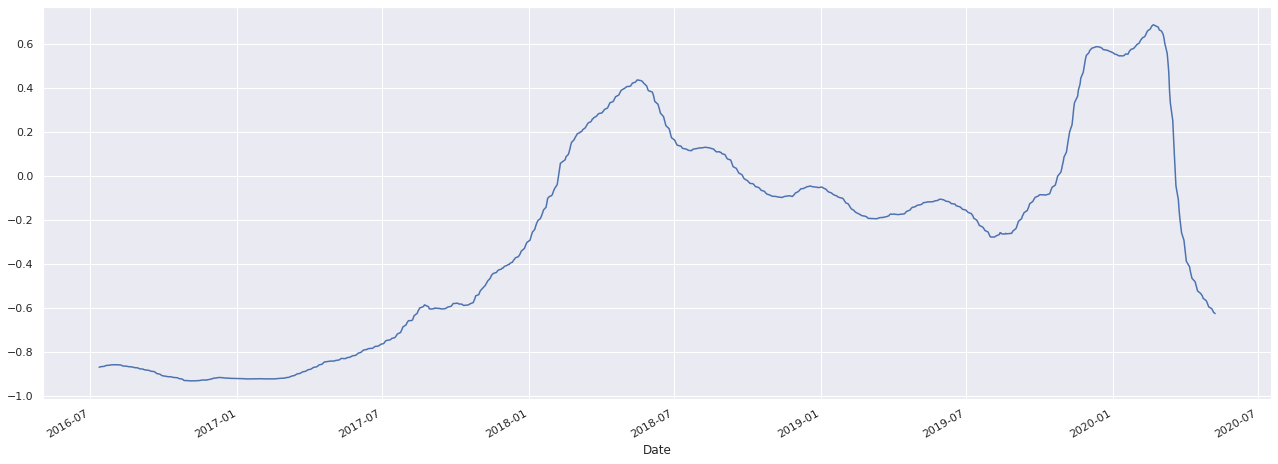

In [0]:
# Desenhe um gráfico de correlação para o período de 252(Um ano em dias úteis) para os Ativos selecionados.
portfolio["USDBRL=X"].rolling(252).corr(portfolio["^BVSP"]).plot(figsize=(22,8))


In [0]:
# Dolarizando ^BVSP
portfolio["^BVSP_in_Dolar"] = (portfolio["^BVSP"] / portfolio["USDBRL=X"])
portfolio

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Symbols,^BVSP,USDBRL=X,^BVSP_in_Dolar
Date,,,
2015-05-11,57197.000000,3.0564,18713.845984
2015-05-12,56792.000000,3.0175,18820.878686
2015-05-13,56372.000000,3.0365,18564.795134
2015-05-14,56657.000000,2.9899,18949.462482
2015-05-18,56204.000000,3.0058,18698.516147
...,...,...,...
2020-04-30,80506.000000,5.4860,14674.808440
2020-05-04,78876.000000,5.5406,14236.003776
2020-05-05,79471.000000,5.5781,14246.965291


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed4fb7ac8>,
      dtype=object)

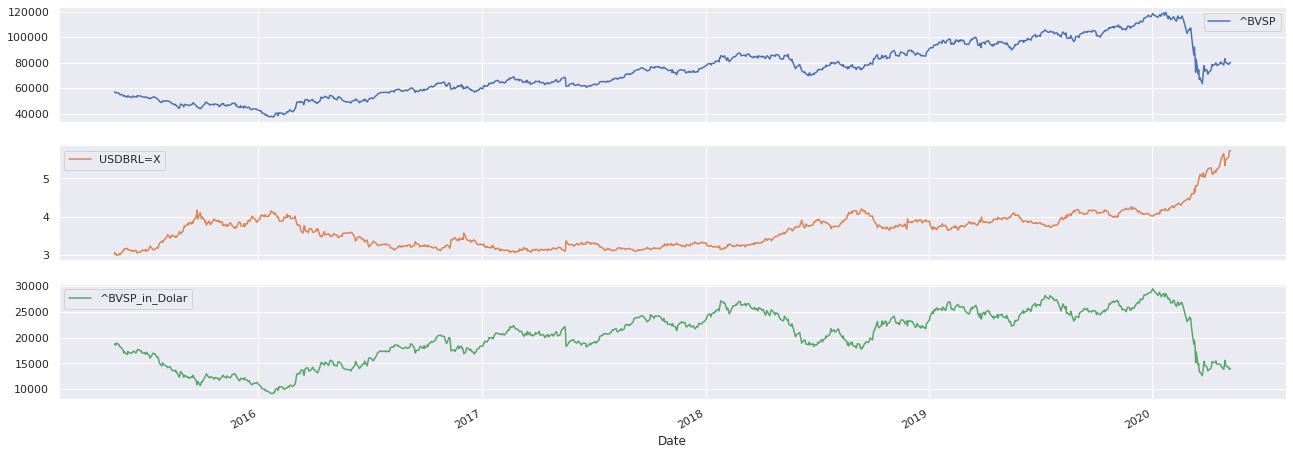

In [0]:
# Desenhe o gráfico da correlação anterior
portfolio.plot(subplots=True, figsize=(22,8))

In [0]:
# %portfolio2 %ibov Relacionando Ativos e o índice ^BVSP
portfolio2 = yf.download("ITUB3.SA, ITUB4.SA, ITSA3.SA, ITSA4.SA", period="5y")["Adj Close"]
ibov = yf.download("^BVSP", period="5y")["Adj Close"]
portfolio2, ibov






[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


(             ITSA3.SA  ITSA4.SA   ITUB3.SA   ITUB4.SA
 Date                                                 
 2015-05-08   5.727091  5.781542  15.276380  16.936813
 2015-05-11   5.667929  5.799405  15.009579  16.857090
 2015-05-12   5.679765  5.745818  15.013877  16.781778
 2015-05-13   5.620596  5.638643  14.996689  16.666710
 2015-05-14   5.632432  5.686276  15.061206  16.830490
 ...               ...       ...        ...        ...
 2020-05-04  10.260000  8.700000  21.100000  21.889999
 2020-05-05  10.340000  8.910000  21.799999  22.700001
 2020-05-06  10.240000  8.700000  21.500000  22.240000
 2020-05-07   9.970000  8.370000  20.799999  21.520000
 2020-05-08  10.190000  8.490000  21.340000  22.320000
 
 [1242 rows x 4 columns], Date
 2015-05-08    57149.000000
 2015-05-11    57197.000000
 2015-05-12    56792.000000
 2015-05-13    56372.000000
 2015-05-14    56657.000000
                   ...     
 2020-05-04    78876.000000
 2020-05-05    79471.000000
 2020-05-06    79064.000000


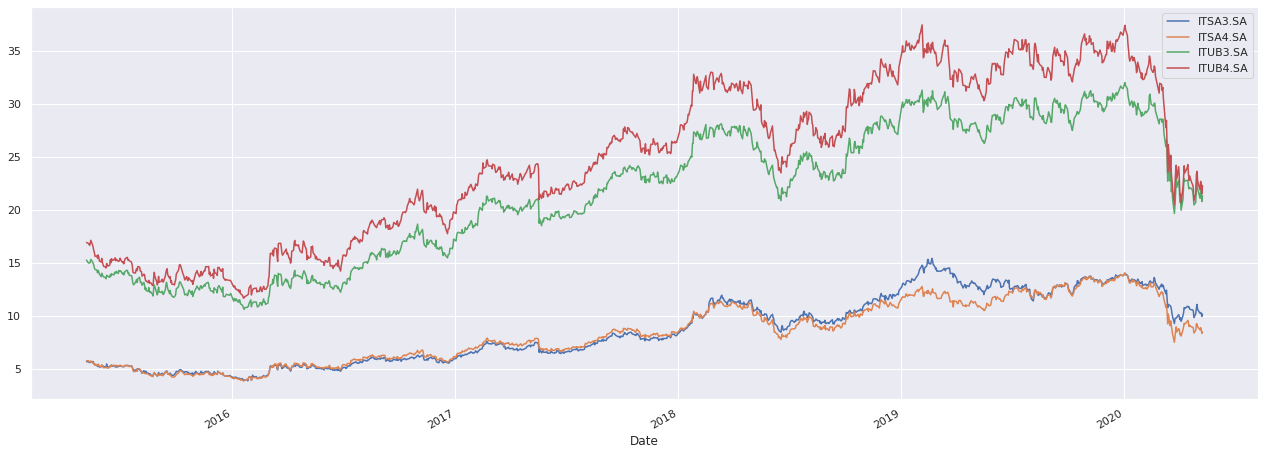

In [0]:
# Desenhando a relação de Ativos.
portfolio2.plot(figsize=(22,8))

In [0]:
# %portfolio3 Correlacionando os Ativos relacionados.
portfolio3 = portfolio2.corr()
portfolio3

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
ITSA3.SA,1.000000,0.982137,0.968188,0.959967
ITSA4.SA,0.982137,1.000000,0.985588,0.982087
ITUB3.SA,0.968188,0.985588,1.000000,0.995913
ITUB4.SA,0.959967,0.982087,0.995913,1.000000


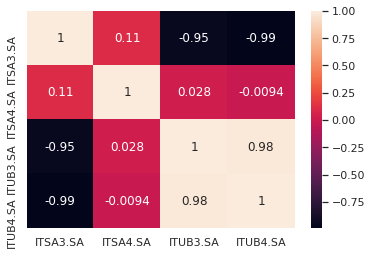

In [0]:
# Calcular a correlação dos Ativos relacionados.
sns.heatmap(portfolio3.corr(), annot=True)

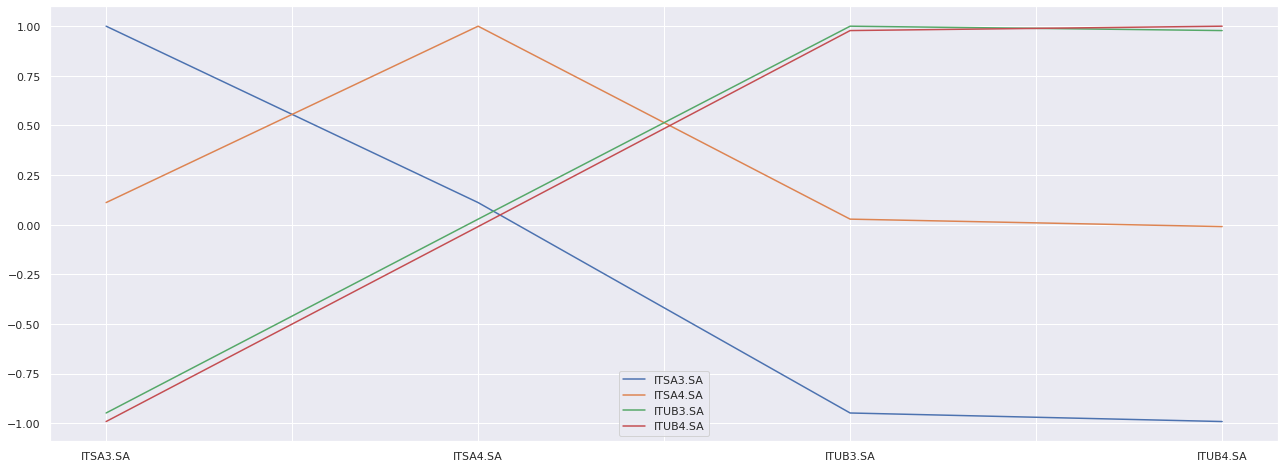

In [0]:
# Desenhe um gráfico de correlação dos Ativos relacionados.
portfolio3.corr().plot(figsize=(22,8))

In [0]:
# %portfolio_ajusted Normalizar a correlação de Ativos simulando uma compra de 10 Mil reais em cada Ativo.
portfolio_ajusted = (portfolio2 / portfolio2.iloc[0])*10000
portfolio_ajusted

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-08,10000.000000,10000.000000,10000.000000,10000.000000
2015-05-11,9896.697753,10030.897076,9825.350713,9952.928950
2015-05-12,9917.363698,9938.209972,9828.164344,9908.462699
2015-05-13,9814.050628,9752.835765,9816.912940,9840.522861
2015-05-14,9834.716572,9835.224943,9859.146128,9937.223585
...,...,...,...,...
2020-05-04,17914.853578,15047.888736,13812.173404,12924.508839
2020-05-05,18054.540409,15411.113710,14270.396409,13402.757820
2020-05-06,17879.931037,15047.888736,14074.015299,13131.159508


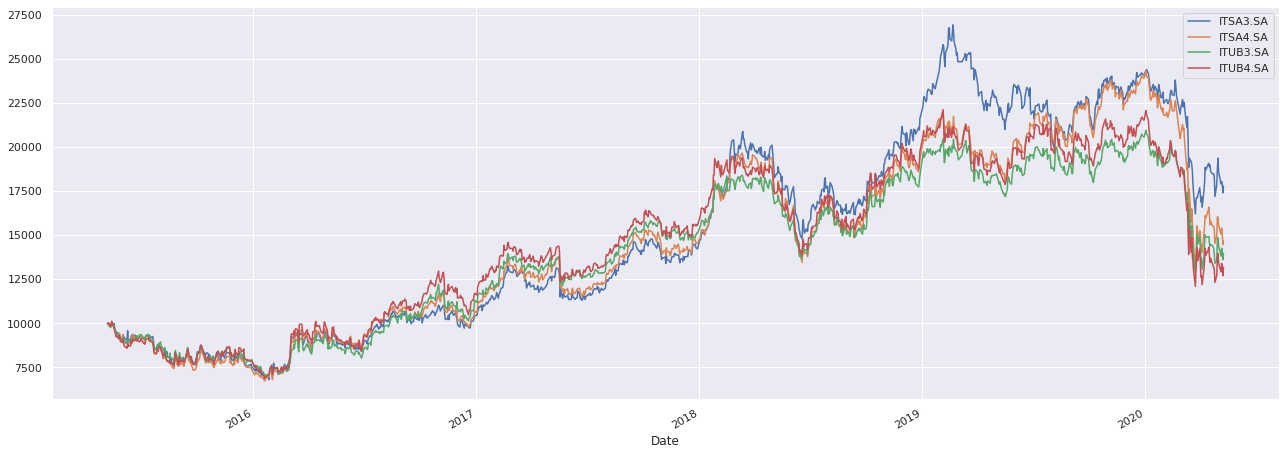

In [0]:
# Desenhe a correlação simulada anterior
portfolio_ajusted.plot(figsize=(22,8))

In [0]:
# Criar uma coluna de Saldo para o efeito de relacionar a perfomance do portfolio.
portfolio_ajusted["result"] = portfolio_ajusted.sum(axis=1)
portfolio_ajusted                                                    

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,result
Date,,,,,
2015-05-08,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2015-05-11,9896.697753,10030.897076,9825.350713,9952.928950,39705.874493
2015-05-12,9917.363698,9938.209972,9828.164344,9908.462699,39592.200713
2015-05-13,9814.050628,9752.835765,9816.912940,9840.522861,39224.322193
2015-05-14,9834.716572,9835.224943,9859.146128,9937.223585,39466.311228
...,...,...,...,...,...
2020-05-04,17914.853578,15047.888736,13812.173404,12924.508839,59699.424556
2020-05-05,18054.540409,15411.113710,14270.396409,13402.757820,61138.808347
2020-05-06,17879.931037,15047.888736,14074.015299,13131.159508,60132.994580


In [0]:
# %ibov_ajusted Normalizar o ^BVSP simulando uma compra de 40 Mil reais (Relação de Ativos anterior).
ibov_ajusted = (ibov / ibov.iloc[0])*40000
ibov_ajusted

Date
2015-05-08    40000.000000
2015-05-11    40033.596388
2015-05-12    39750.126861
2015-05-13    39456.158463
2015-05-14    39655.637019
                  ...     
2020-05-04    55207.265219
2020-05-05    55623.720450
2020-05-06    55338.851074
2020-05-07    54677.422177
2020-05-08    56178.306926
Name: Adj Close, Length: 1236, dtype: float64

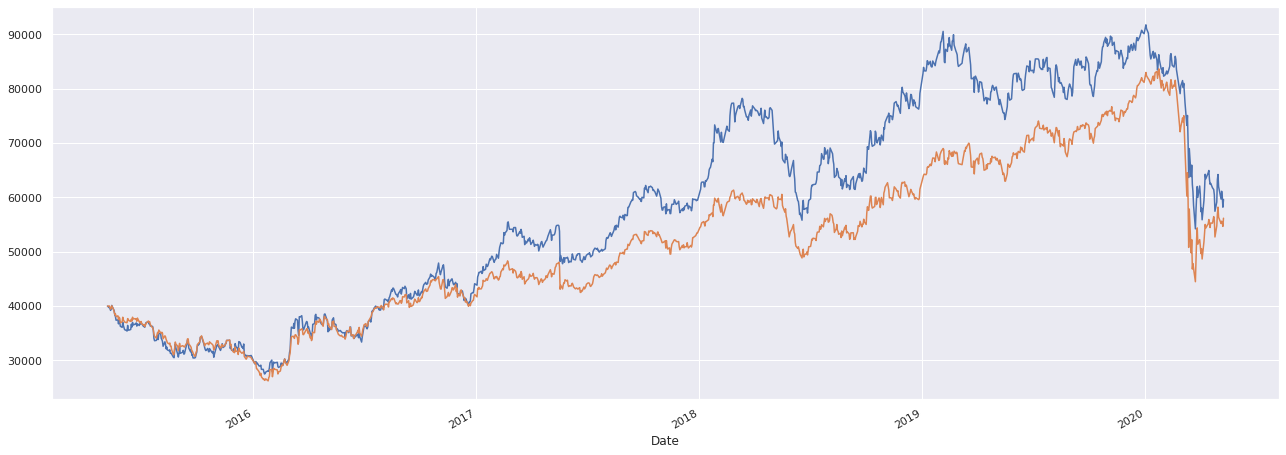

In [0]:
# Desenhe a relação de Ativos e o ^BVSP
portfolio_ajusted["result"].plot(figsize=(22,8), label="Portfolio Ajusted")
ibov_ajusted.plot(label="ibov")
